## Exercise - Investigate Trending Skills

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list) # Converts column to list type - Allows for .explode()

In [3]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy() # Creates dataframe with only Data Analyst job postings

In [ ]:
# Creates a new column for the month no. of the job posting
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [ ]:
# Explode Job Skills column
df_DA_explode = df_DA.explode('job_skills')


In [ ]:
# Pivoting the exploded df
df_DA_pivot = (df_DA_explode
               .pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)
               )

# df_DA_pivot.plot(kind='line')

In [17]:

df_DA_pivot.loc['Total'] = df_DA_pivot.sum() # Creating a Total row in the pivot table 

# Sorting in descending order of Total, and getting the index of those values
df_DA_pivot.loc['Total'].sort_values(ascending=False).index 

# Actually assigning the sorted pivot table to df_DA_pivot
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index] 

df_DA_pivot = df_DA_pivot.drop('Total') # Dropping the 'Total' row now that we dont need it anymore

df_DA_pivot
#df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

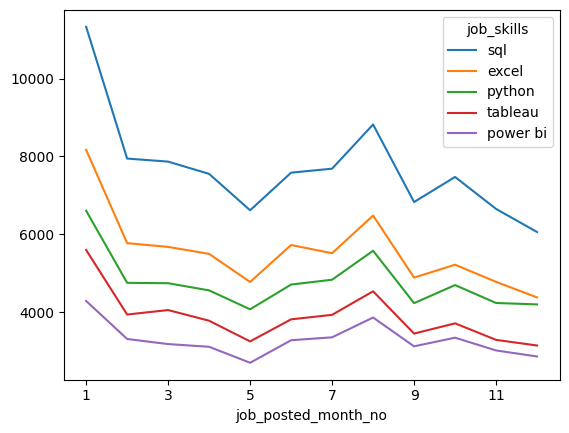

In [19]:
df_DA_pivot.iloc[:, :5].plot(kind='line') # All rows, first 5 columns